# Logistic Regression from Scratch (using Numpy)

## Import Numpy (and Pandas + Sklearn for Preprocessing)

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

## Check Data (pandas)

In [185]:
bc = load_breast_cancer()

In [186]:
# Read in Pandas
df = pd.DataFrame(bc.data, columns = bc.feature_names)
df["target"] = bc.target
df.head()
print("Number of Observations:", len(df))
print("Number of Variables:", len(df.columns))

Number of Observations: 569
Number of Variables: 31


In [187]:
print(f"Skew: {round((df.target.sum() / len(df))*100, 2)}%")

Skew: 62.74%


In [188]:
# Check for Null Columns
null_index = {}
for col in list(df.columns):
    null_index[col] = int(df[col].isnull().sum())

In [189]:
# View Dictionary
null_index

{'mean radius': 0,
 'mean texture': 0,
 'mean perimeter': 0,
 'mean area': 0,
 'mean smoothness': 0,
 'mean compactness': 0,
 'mean concavity': 0,
 'mean concave points': 0,
 'mean symmetry': 0,
 'mean fractal dimension': 0,
 'radius error': 0,
 'texture error': 0,
 'perimeter error': 0,
 'area error': 0,
 'smoothness error': 0,
 'compactness error': 0,
 'concavity error': 0,
 'concave points error': 0,
 'symmetry error': 0,
 'fractal dimension error': 0,
 'worst radius': 0,
 'worst texture': 0,
 'worst perimeter': 0,
 'worst area': 0,
 'worst smoothness': 0,
 'worst compactness': 0,
 'worst concavity': 0,
 'worst concave points': 0,
 'worst symmetry': 0,
 'worst fractal dimension': 0,
 'target': 0}

### Change to Numpy

In [190]:
X_all = df.drop(columns = ["target"]).values[:, 1:]
y_all = df["target"].values

## Train Test Split Sklearn

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, random_state = 0, test_size = 0.2)

## Normalize

In [192]:
def normalize(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    return (X-mean)/std

In [193]:
X_train = normalize(X_train)
X_test = normalize(X_test)

## Logistic Regression Model

In [194]:
class LogisticRegression():
    def __init__(self):
        self.weights = None
        self.costs = None

    def sigmoid(self, z):
        sig = 1/(1+np.exp(-z))
        return sig

    def fit(self, X, y, learning_rate = 0.01, iterations = 100, stopping_threshold = 1e-4):
        # Using Batch Gradient Descent
        #TODO: Implement Stochastic Gradient Descent

        # Create Bias Column
        col_ones = np.ones(shape=(X.shape[0],1))
        X = np.concatenate((col_ones, X), axis = 1)

        # Reshape y
        y = y.reshape(-1, 1)

        # Initialize Weights
        self.weights = np.zeros((X.shape[1], 1))

        # Num Cols
        m = X.shape[0]

        # Costs
        costs = []
        cost = 99999 # initialize cost

        # Precompute Transpose
        X_transpose = X.T

        # Gradient Descent
        for i in range(iterations):
            cost_prev = cost

            # Compute Hypothesis Function
            h = self.sigmoid(np.dot(X, self.weights))
            h = np.clip(h, 1e-15, 1 - 1e-15)

            # Compute Gradient
            grad = (1/m) * np.dot(X_transpose, h-y)

            # Update Weights
            self.weights -= learning_rate * grad

            # Compute Cost
            cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
            costs.append(cost)
            # print("Iteration:", i)
            # print("Cost:", cost)

            # Stopping Criteria
            if abs(cost_prev-cost) <= stopping_threshold:
                self.costs = costs
                break

        self.costs = costs

    def predict(self, X):
        # Create Bias Column
        col_ones = np.ones(shape=(X.shape[0],1))
        X = np.concatenate((col_ones, X), axis = 1)

        p = self.sigmoid(np.dot(X, self.weights))
        p = p >= 0.5
        p = p.astype(int)
        return p

## Accuracy Score

In [195]:
def accuracy_score(y_pred, y_true, r=2):
    y_pred.reshape(-1, 1)
    y_true = y_true.reshape(-1, 1)

    acc = (y_pred == y_true).sum() / len(y_true)
    acc = round(acc, r)
    return acc

## Function Calls

### Fit Model

In [196]:
model = LogisticRegression()
model.fit(X_train, y_train, learning_rate = 0.5)

### Get Predictions and Accuracy

In [197]:
p = model.predict(X_train)
accuracy = accuracy_score(p, y_train)
print(f"Train Accuracy: {accuracy*100}%")

Train Accuracy: 99.0%


In [198]:
p = model.predict(X_test)
accuracy = accuracy_score(p, y_test)
print(f"Test Accuracy: {accuracy*100}%")

Test Accuracy: 96.0%


### Plot Gradient

Text(0.5, 1.0, 'Costs vs Iterations')

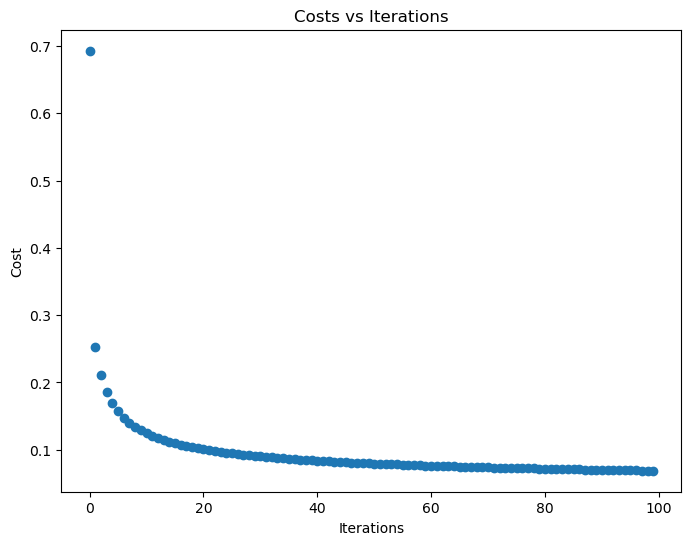

In [199]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(model.costs)), model.costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Costs vs Iterations")